# Análisis Exploratorio de Datos (EDA)

Este análisis exploratorio tiene como objetivo comprender la estructura y comportamiento del dataset limpio que será utilizado para entrenar un modelo de detección de intrusiones basado en inteligencia artificial (IDS). El dataset contiene tráfico de red etiquetado como benigno o malicioso, y ha sido previamente procesado para eliminar valores nulos, duplicados y normalizar las variables numéricas.

A través de este análisis, se busca:

- Identificar distribuciones de variables clave
- Evaluar el balance de clases (ataques vs tráfico normal)
- Detectar relaciones entre características mediante correlación
- Obtener una base sólida para el entrenamiento del modelo

---

## Índice de Secciones

1. [Carga del Dataset e Información General](#1-carga-del-dataset-e-información-general)
2. [Resumen Estadístico del Dataset](#2-resumen-estadístico-del-dataset)
3. [Distribución de Clases (Label)](#3-distribución-de-clases-label)
4. [Matriz de Correlación](#4-matriz-de-correlación)
5. [Distribución de Características Clave](#5-distribución-de-características-clave)
6. [Boxplots](#6-Boxplots)

---

Cada sección incluye el código correspondiente en Python y una explicación detallada para facilitar la interpretación de los resultados.


## 1. Carga del Dataset e Información General

En este primer paso, cargamos el dataset limpio que contiene datos de tráfico de red previamente preprocesados. Utilizamos la función `df.info()` para obtener una visión general de la estructura del dataset:

- Número de filas y columnas
- Nombres de las columnas
- Tipo de datos de cada columna
- Cantidad de valores no nulos por columna

Esto nos permite detectar si aún existen valores nulos, qué tipo de variables tenemos (enteras, flotantes, categóricas) y si el dataset está listo para su análisis.


In [7]:
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv("../archive/cleaned_dataset.csv")  # Cambia la ruta si tu archivo está en otra carpeta

# Mostrar información general del dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223108 entries, 0 to 223107
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             223108 non-null  float64
 1   Flow Duration                223108 non-null  float64
 2   Total Fwd Packets            223108 non-null  float64
 3   Total Backward Packets       223108 non-null  float64
 4   Total Length of Fwd Packets  223108 non-null  float64
 5   Total Length of Bwd Packets  223108 non-null  float64
 6   Fwd Packet Length Max        223108 non-null  float64
 7   Fwd Packet Length Min        223108 non-null  float64
 8   Fwd Packet Length Mean       223108 non-null  float64
 9   Fwd Packet Length Std        223108 non-null  float64
 10  Bwd Packet Length Max        223108 non-null  float64
 11  Bwd Packet Length Min        223108 non-null  float64
 12  Bwd Packet Length Mean       223108 non-null  float64
 13 

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.311782,-0.519057,-0.187328,-0.210766,-0.287007,-0.152861,-0.287358,-0.133352,-0.316103,-0.271206,...,-0.350023,-0.233073,-0.061876,-0.232581,-0.227885,-0.475752,-0.284941,-0.481831,-0.393728,0
1,2.321305,-0.519054,-0.251803,-0.165063,-0.288843,-0.152709,-0.287358,-0.133352,-0.316103,-0.271206,...,-0.350023,-0.233073,-0.061876,-0.232581,-0.227885,-0.475752,-0.284941,-0.481831,-0.393728,0
2,2.321355,-0.519056,-0.251803,-0.165063,-0.288843,-0.152709,-0.287358,-0.133352,-0.316103,-0.271206,...,-0.350023,-0.233073,-0.061876,-0.232581,-0.227885,-0.475752,-0.284941,-0.481831,-0.393728,0
3,1.877013,-0.519056,-0.251803,-0.165063,-0.288843,-0.152709,-0.287358,-0.133352,-0.316103,-0.271206,...,-0.350023,-0.233073,-0.061876,-0.232581,-0.227885,-0.475752,-0.284941,-0.481831,-0.393728,0
4,2.311681,-0.519057,-0.187328,-0.210766,-0.287007,-0.152861,-0.287358,-0.133352,-0.316103,-0.271206,...,-0.350023,-0.233073,-0.061876,-0.232581,-0.227885,-0.475752,-0.284941,-0.481831,-0.393728,0


## 2. Resumen Estadístico del Dataset

En esta sección se utiliza el método `df.describe()` para generar un resumen estadístico de las variables numéricas del dataset. Esta función proporciona estadísticas como:

- **count**: número de valores no nulos
- **mean**: media
- **std**: desviación estándar
- **min / max**: valores mínimo y máximo
- **25%, 50%, 75%**: cuartiles

Este análisis permite identificar la escala de las variables, su dispersión y posibles valores atípicos que podrían influir en el rendimiento del modelo.


In [8]:
# Mostrar resumen estadístico del dataset
df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,...,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,2.231080e+05,223108.000000
mean,8.980989e-17,3.286660e-17,-1.458615e-17,6.369496e-20,1.222943e-17,1.515940e-17,-3.261182e-17,4.713427e-17,-1.457341e-16,4.993685e-17,...,-3.342711e-16,7.566961e-17,7.350398e-17,1.019119e-18,-2.547798e-19,1.146509e-16,1.243326e-16,-4.586037e-17,5.197509e-17,0.573785
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.494527
min,-4.525691e-01,-5.190572e-01,-2.518033e-01,-2.107664e-01,-2.906799e-01,-1.528608e-01,-2.905589e-01,-1.698829e-01,-3.279225e-01,-2.712061e-01,...,-5.229491e+00,-2.330727e-01,-6.187599e-02,-2.325810e-01,-2.278852e-01,-4.757521e-01,-2.849406e-01,-4.818314e-01,-3.937278e-01,0.000000
25%,-4.485384e-01,-5.164782e-01,-1.873281e-01,-1.650632e-01,-2.827218e-01,-1.528608e-01,-2.873577e-01,-1.698829e-01,-3.161028e-01,-2.712061e-01,...,-3.500231e-01,-2.330727e-01,-6.187599e-02,-2.325810e-01,-2.278852e-01,-4.757521e-01,-2.849406e-01,-4.818314e-01,-3.937278e-01,0.000000
50%,-4.485384e-01,-4.705258e-01,-1.228530e-01,-2.795355e-02,-2.814974e-01,-1.487031e-01,-2.798881e-01,-1.698829e-01,-3.108496e-01,-2.645931e-01,...,-3.500231e-01,-2.330727e-01,-6.187599e-02,-2.325810e-01,-2.278852e-01,-4.757521e-01,-2.849406e-01,-4.818314e-01,-3.937278e-01,1.000000
75%,-4.485384e-01,-2.361193e-01,6.097321e-03,1.774966e-02,-2.717028e-01,1.412511e-01,-2.718850e-01,-1.333518e-01,-2.648842e-01,-2.584053e-01,...,-3.500231e-01,-2.306150e-01,-6.187599e-02,-2.304026e-01,-2.253923e-01,-9.224795e-02,-2.849406e-01,-1.695507e-01,-1.616331e-02,1.000000
max,2.849235e+00,3.271175e+00,1.242497e+02,1.342481e+02,5.572596e+01,1.309779e+02,5.941202e+00,8.792398e+00,7.289865e+00,8.076189e+00,...,7.457125e+00,1.243977e+02,1.866928e+02,1.102340e+02,1.265726e+02,4.990530e+00,4.806299e+00,3.955511e+00,5.627383e+00,1.000000


## 3. Distribución de Clases (Label)

En este paso analizamos cómo están distribuidos los registros entre las dos clases del dataset:

- **Clase 0**: Tráfico benigno
- **Clase 1**: Tráfico malicioso (ataques)

Este análisis es fundamental para detectar si existe un **desbalance de clases**, lo cual puede afectar negativamente el entrenamiento del modelo. Si una clase tiene muchas más muestras que la otra, el modelo puede sesgarse y predecir mayormente la clase mayoritaria.

Se incluye también el porcentaje que representa cada clase para tener una visión más clara del equilibrio entre ambas.


/tmp/ipykernel_10045/2704683391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Label"], palette="Set2")


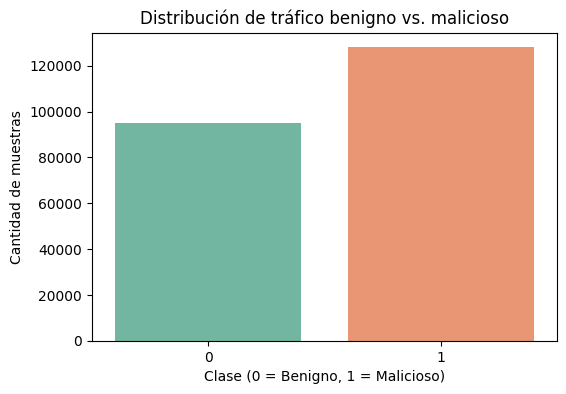


Porcentaje por clase:
 Label
1    57.378489
0    42.621511
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo (Label)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Label"], palette="Set2")
plt.title("Distribución de tráfico benigno vs. malicioso")
plt.xlabel("Clase (0 = Benigno, 1 = Malicioso)")
plt.ylabel("Cantidad de muestras")
plt.show()

# Porcentaje por clase
porcentajes = df["Label"].value_counts(normalize=True) * 100
print("\nPorcentaje por clase:\n", porcentajes)


### Análisis de Resultados

El dataset presenta una distribución de clases relativamente equilibrada:

- **57.38% de tráfico malicioso (1)**
- **42.62% de tráfico benigno (0)**

Esta proporción es adecuada para entrenar un modelo de clasificación, ya que no existe un desbalance extremo entre clases. Esto es especialmente importante en problemas de detección de intrusiones, donde un alto desbalance podría causar que el modelo aprenda a predecir únicamente la clase mayoritaria.

Con esta distribución:

- El modelo podrá aprender patrones tanto del tráfico benigno como del malicioso.
- No es necesario aplicar técnicas de rebalanceo como SMOTE o undersampling.
- Las métricas como **recall** y **F1-score** serán más representativas del rendimiento real.

En resumen, la proporción actual entre clases es favorable para el desarrollo del modelo de detección de intrusiones.


## 4. Matriz de Correlación entre Variables

La matriz de correlación permite identificar la relación entre variables numéricas del dataset. Cada valor en la matriz representa el grado de correlación entre dos características:

- Valores cercanos a **1** indican una **correlación positiva fuerte**
- Valores cercanos a **-1** indican una **correlación negativa fuerte**
- Valores cercanos a **0** indican **poca o ninguna correlación**

Este análisis es útil para:

- Detectar variables redundantes (altamente correlacionadas) que podrían ser eliminadas.
- Identificar relaciones interesantes entre características que puedan ser útiles para el modelo.
- Evitar colinealidad excesiva en modelos sensibles a correlaciones como regresión logística.

La matriz se visualiza con un mapa de calor (*heatmap*) que resalta las correlaciones más fuertes en rojo o azul según su signo.


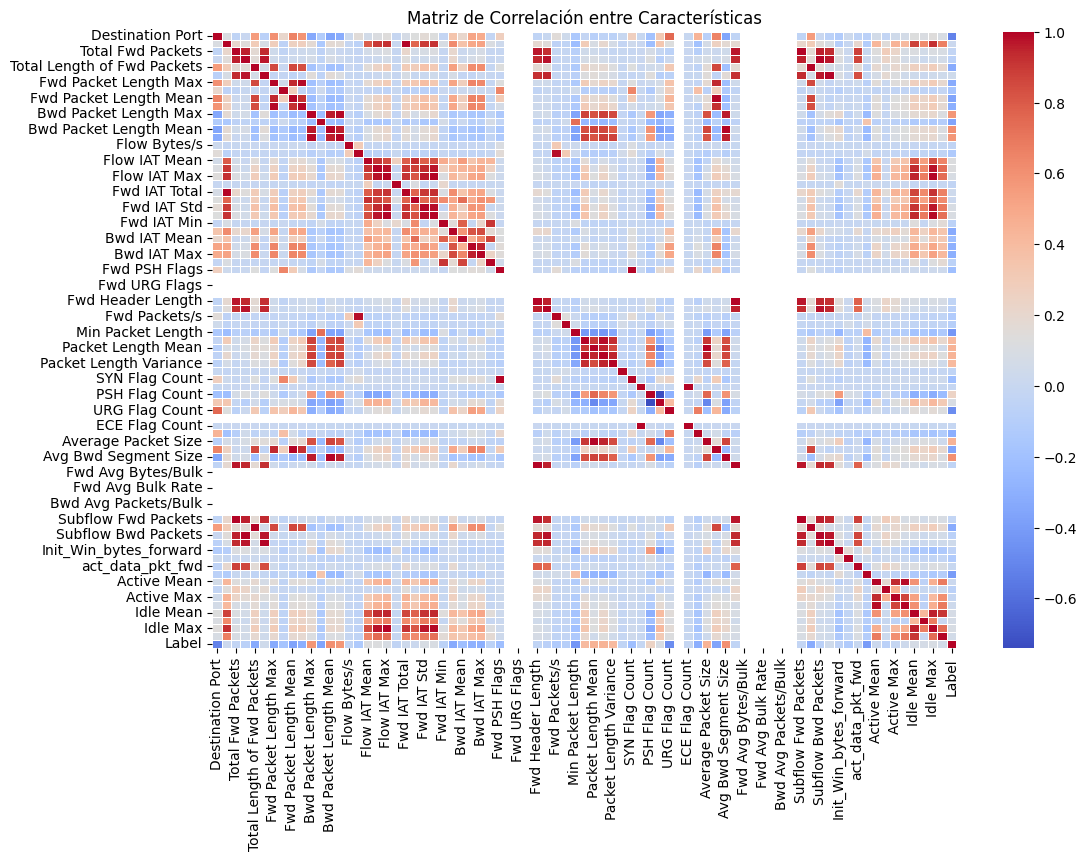

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Características")
plt.show()


### Análisis del Output de la Matriz de Correlación

Al observar la matriz de correlación generada, se pueden destacar los siguientes puntos clave:

1. **Distribución general de correlaciones**

   La mayoría de los valores de correlación entre características se encuentran en rangos bajos o moderados, lo cual es positivo. Esto sugiere que no hay redundancia excesiva entre variables, lo que favorece una mayor diversidad de información para el modelo.

2. **Presencia de grupos altamente correlacionados**

   Se detectan varios grupos de variables con correlación alta entre sí. Específicamente:

   - Las variables relacionadas con paquetes `Fwd` (adelante) y `Bwd` (atrás) presentan fuertes correlaciones entre sus versiones máximas, mínimas y medias.
   - También se aprecia una correlación notable entre `Packet Length Mean` y `Packet Length Variance`, lo cual es lógico, ya que ambas describen el comportamiento del tamaño de los paquetes.

   Estas correlaciones son esperadas, ya que muchas de estas características derivan de la misma fuente de información. Aunque no es estrictamente necesario eliminarlas, podrían ser consideradas redundantes en modelos más simples o cuando se aplique reducción de dimensionalidad.

3. **Relación con la variable objetivo (`Label`)**

   La columna correspondiente a `Label` no muestra correlaciones fuertes con ninguna variable individual. Esto indica que ninguna característica por sí sola es suficiente para predecir el tipo de tráfico. Esta falta de correlación directa justifica el uso de modelos de aprendizaje automático, capaces de detectar patrones más complejos y combinaciones de múltiples variables.

### Conclusión

El análisis de la matriz de correlación confirma que el dataset contiene una buena variedad de variables no redundantes, con relaciones lógicas entre características relacionadas. La baja correlación directa con la variable objetivo refuerza la necesidad de un enfoque basado en modelos de clasificación inteligentes.


## 5. Distribución de Características Clave

En este paso se visualizan las distribuciones de algunas variables numéricas representativas del tráfico de red:

- `Flow Duration`: Duración de cada flujo de red
- `Total Fwd Packets`: Cantidad total de paquetes enviados en dirección "forward"
- `Total Backward Packets`: Cantidad total de paquetes enviados en dirección "backward"

Estas gráficas permiten detectar:

- **Valores extremos** o sesgos (por ejemplo, si los datos están concentrados en un rango pequeño)
- **Asimetrías** en la distribución
- **Potenciales outliers** que podrían impactar el rendimiento del modelo

La presencia de picos o colas largas en las distribuciones puede indicar comportamientos típicos de ciertos tipos de tráfico o ataques.


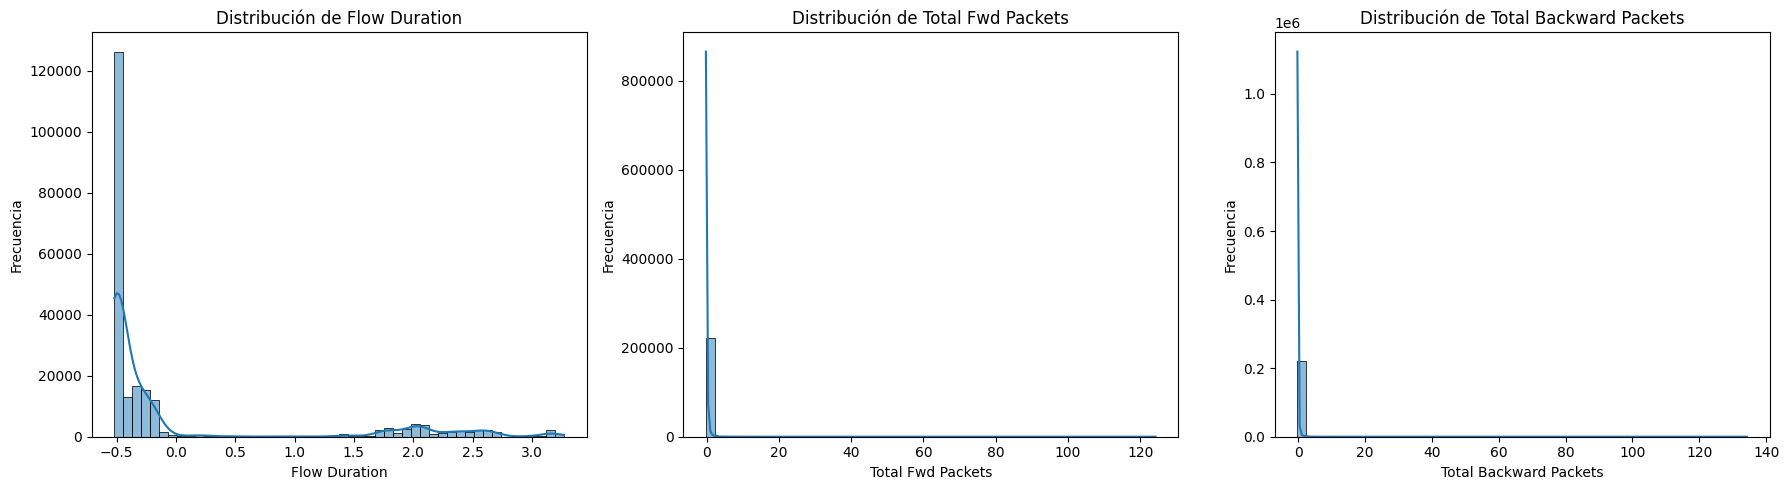

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos algunas variables clave a visualizar
columnas_a_visualizar = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets"]

# Creamos gráficos de distribución para cada una
plt.figure(figsize=(18, 5))

for i, columna in enumerate(columnas_a_visualizar):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[columna], bins=50, kde=True)
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### Análisis del Output: Distribución de Características Clave

Aunque el dataset ha sido previamente normalizado usando `StandardScaler`, es útil observar la forma de las distribuciones resultantes. A pesar de la estandarización, se mantienen los patrones originales de asimetría y dispersión.

1. **Flow Duration**  
   La duración de los flujos presenta una distribución muy sesgada hacia la izquierda, con una gran concentración de flujos muy cortos y una cola larga que representa conexiones mucho más largas. Esto es típico en entornos reales, donde predominan las comunicaciones breves.

2. **Total Fwd Packets / Total Backward Packets**  
   Ambas variables muestran una fuerte concentración de valores bajos (entre 0 y 10 paquetes), acompañados de colas largas que alcanzan más de 100 paquetes. Esto indica que la mayoría de los flujos contienen pocos paquetes, pero existen algunos significativamente más intensos, lo cual podría estar relacionado con tráfico anómalo o ataques.

### Conclusión

Estas distribuciones, aunque escaladas, siguen mostrando comportamientos propios del tráfico de red real: altamente asimétrico, con la presencia de posibles valores extremos. No es necesario corregir estos valores, pero es importante que el modelo sea capaz de manejarlos correctamente durante el entrenamiento.
